In [477]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/pollution.csv')
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [478]:
condition = (df['Station code'] == 108)
df = df[condition]
df.reset_index(drop = True, inplace = True)

In [479]:
df = df.drop(['Station code','Address','Latitude','Longitude'], axis=1)
df["Measurement date"] = pd.to_datetime(df["Measurement date"])
df.head()

,Measurement date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00:00,0.004,0.045,0.003,0.8,68.0,63.0
1,2017-01-01 01:00:00,0.004,0.045,0.003,0.9,71.0,62.0
2,2017-01-01 02:00:00,0.004,0.043,0.003,0.9,69.0,62.0
3,2017-01-01 03:00:00,0.004,0.039,0.003,0.7,70.0,63.0
4,2017-01-01 04:00:00,0.004,0.038,0.003,0.8,69.0,59.0


In [480]:
weather_df = pd.concat(
    [
        pd.concat(
            [pd.read_csv('data/2017.csv'),pd.read_csv('data/2018.csv')],
            ignore_index = True
        ),
        pd.read_csv('data/2019.csv')
    ],
    ignore_index = True
)
weather_df.tail()
weather_df = weather_df.drop(["Station code"],axis=1)
weather_df["Measurement date"] = pd.to_datetime(weather_df['Measurement date'])
weather_df.head()

,Measurement date,precipitation,wind_speed,wind_direction,humidity,local pressure,ground_temperature
0,2017-01-01 01:00:00,NaN,1.4,20.0,78.0,1018.9,-0.9
1,2017-01-01 02:00:00,NaN,1.9,50.0,81.0,1018.5,-1.8
2,2017-01-01 03:00:00,NaN,2.0,50.0,84.0,1018.8,-2.1
3,2017-01-01 04:00:00,NaN,1.6,20.0,85.0,1018.6,-2.4
4,2017-01-01 05:00:00,NaN,1.4,50.0,86.0,1018.3,-2.6


In [481]:
df = pd.merge(df,weather_df, how='left', on = 'Measurement date')
df['precipitation'] = df['precipitation'].fillna(0)
df = df.fillna(method = "bfill")
df['PM10'] = df['PM10'].replace(-1,0)
df.sort_values(by=['PM10'],ascending=False).head(150)

,Measurement date,SO2,NO2,O3,CO,PM10,PM2.5,precipitation,wind_speed,wind_direction,humidity,local pressure,ground_temperature
4404,2017-07-03 12:00:00,0.000,0.000,0.000,0.0,1661.0,0.0,0.0,2.9,230.0,80.0,996.1,29.5
23718,2019-10-01 20:00:00,0.004,0.025,0.017,0.8,985.0,31.0,0.0,3.6,140.0,69.0,1007.9,24.5
14183,2018-08-14 23:00:00,0.006,0.013,0.032,0.4,985.0,23.0,0.0,0.4,0.0,65.0,999.5,28.5
14635,2018-09-02 19:00:00,0.004,0.021,0.030,0.5,985.0,11.0,0.0,1.5,140.0,54.0,997.4,27.7
14519,2018-08-28 23:00:00,0.004,0.024,0.005,0.5,985.0,1.0,3.5,1.0,90.0,97.0,1000.6,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11536,2018-04-26 16:00:00,0.003,0.017,0.062,0.7,336.0,325.0,0.0,2.5,200.0,23.0,1002.2,31.3
11057,2018-04-06 17:00:00,0.002,0.015,0.035,0.3,333.0,30.0,0.0,4.4,270.0,50.0,1000.5,9.3
11056,2018-04-06 16:00:00,0.002,0.015,0.033,0.3,319.0,30.0,0.0,4.0,270.0,50.0,1000.9,10.4
6856,2017-10-13 16:00:00,0.003,0.018,0.031,0.4,317.0,327.0,0.0,4.7,290.0,35.0,1011.0,18.2


In [482]:
df['Measurement date'] = pd.to_datetime(df['Measurement date'], unit = 'ms', origin = 'unix').astype(int)

df

/tmp/ipykernel_29683/1888872887.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['Measurement date'] = pd.to_datetime(df['Measurement date'], unit = 'ms', origin = 'unix').astype(int)


,Measurement date,SO2,NO2,O3,CO,PM10,PM2.5,precipitation,wind_speed,wind_direction,humidity,local pressure,ground_temperature
0,1483228800000000000,0.004,0.045,0.003,0.8,68.0,63.0,0.0,1.4,20.0,78.0,1018.9,-0.9
1,1483232400000000000,0.004,0.045,0.003,0.9,71.0,62.0,0.0,1.4,20.0,78.0,1018.9,-0.9
2,1483236000000000000,0.004,0.043,0.003,0.9,69.0,62.0,0.0,1.9,50.0,81.0,1018.5,-1.8
3,1483239600000000000,0.004,0.039,0.003,0.7,70.0,63.0,0.0,2.0,50.0,84.0,1018.8,-2.1
4,1483243200000000000,0.004,0.038,0.003,0.8,69.0,59.0,0.0,1.6,20.0,85.0,1018.6,-2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25889,1577818800000000000,0.002,0.022,0.015,0.5,22.0,9.0,0.0,1.7,290.0,38.0,1024.1,-3.6
25890,1577822400000000000,0.002,0.021,0.015,0.5,22.0,12.0,0.0,2.9,290.0,41.0,1024.1,-4.1
25891,1577826000000000000,0.002,0.023,0.012,0.5,20.0,9.0,0.0,0.8,20.0,43.0,1023.9,-4.4
25892,1577829600000000000,0.002,0.027,0.007,0.5,21.0,8.0,0.0,0.0,0.0,42.0,1023.3,-4.6


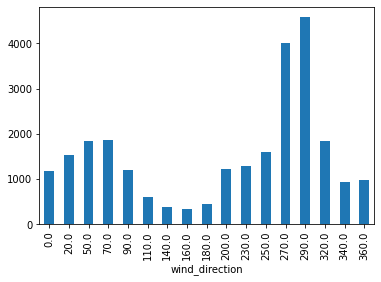

In [483]:
df.groupby('wind_direction').size().plot(kind='bar')
plt.show()


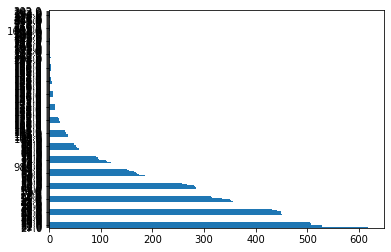

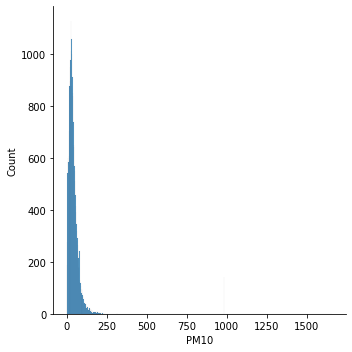

In [484]:
df['PM10'].value_counts(sort=True,dropna = False).plot(kind='barh')
sns.displot(df['PM10'])

Measurement date     SO2    NO2    O3     CO   PM10  PM2.5  precipitation  wind_speed  wind_direction  humidity  local pressure  ground_temperature
1483365600000000000  0.007  0.036  0.041  0.9  GOOD  100.0  0.0            3.1         200.0           59.0      1010.2           15.2                 1
1549393200000000000  0.004  0.062  0.001  0.9  GOOD  32.0   0.0            0.0         0.0             28.0      1007.8           0.0                  1
1549238400000000000  0.004  0.015  0.027  0.9  GOOD  79.0   0.0            2.2         250.0           86.0      1007.8           0.2                  1
1549242000000000000  0.004  0.013  0.029  0.8  GOOD  73.0   0.0            3.2         290.0           55.0      1009.4           0.0                  1
1549245600000000000  0.004  0.016  0.026  0.8  GOOD  66.0   0.0            2.7         320.0           51.0      1010.7          -0.1                  1
                                                                                       

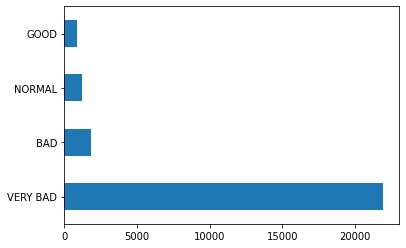

In [485]:
# ~30 좋음
# 30~80 보통
# 80~150 나쁨
# 150~ 매우 나쁨

value_cnts = df['PM10'].value_counts(sort=True,dropna = False).tolist()
value_cnts_index = df['PM10'].value_counts(sort=True,dropna = False).index.tolist()

good_list = []
normal_list = []
bad_list = []
verybad_list = []

for i in range(len(value_cnts)):
    if value_cnts[i] <= 30:
        good_list.append(value_cnts_index[i])
    elif value_cnts[i] <= 80:
        normal_list.append(value_cnts_index[i])
    elif value_cnts[i] <= 150:
        bad_list.append(value_cnts_index[i])
    else:
        verybad_list.append(value_cnts_index[i])
    

def giveGroup(value):
    if value in good_list:
        return "GOOD"
    elif value in normal_list:
        return "NORMAL"
    elif value in bad_list:
        return "BAD"
    elif value in verybad_list:
        return "VERY BAD"

df['PM10'] = df.apply(lambda x: giveGroup(x['PM10']),axis = 1)

df.to_csv("show.csv", index = False)

df['PM10'].value_counts(sort=True,dropna = False).plot(kind='barh')

print(df[(df['PM10'] == "GOOD")].value_counts())
plt.show()

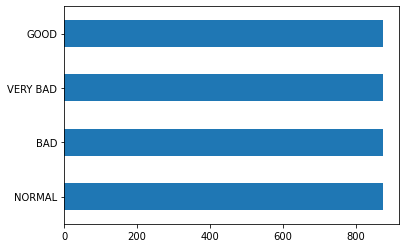

In [486]:
sampling_list = ["VERY BAD", "BAD", "NORMAL"]

new_df = df[df['PM10'] == "GOOD"]

good_count = len(new_df)

for class_name in sampling_list:
    class_index = df[df['PM10'] == class_name].index
    under_sample_index = np.random.choice(class_index, good_count, replace = False)
    under_sample = df.loc[under_sample_index]
    new_df = new_df.append(under_sample)

new_df = new_df.sample(frac=1).reset_index(drop=True)

new_df['PM10'].value_counts(sort=True, dropna=False).plot(kind = "barh")
plt.show()


In [487]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import backend as K

# 날씨 class들의 목록을 선정해 줍니다.
classes = ["GOOD","NORMAL","BAD","VERY BAD"]

# 일시적 딕셔너리를 만들어서 new_df[new_df] 와 같은 중첩된 선언을 피할 수 있습니다.
temp_dict = {}
for c in classes:
    temp_dict[c] = new_df[new_df['PM10'] == c]

train_set = []
val_set = []
test_set = []

for c in classes:
    # 80퍼센트를 샘플링 합니다.
    train = temp_dict[c].sample(frac = 0.8)
    temp_dict[c] = temp_dict[c].drop(train.index)

    #80퍼센트를 샘플링 하고 남은 20퍼센트에서의 50퍼센트는 전체 비율에서 10퍼센트입니다.
    validation = temp_dict[c].sample(frac = 0.5)
    temp_dict[c] = temp_dict[c].drop(validation.index)

    # 추출한 값을 넣어주고, 남은 값을 test 값에 넣어줍니다.
    train_set.append(train)
    val_set.append(validation)
    test_set.append(temp_dict[c])


In [488]:
# 데이터 프레임을 하나로 합칩니다.
train_df = train_set[0]
val_df = val_set[0]
test_df = test_set[0]

for i in range(1,len(train_set)):
    train_df = train_df.append(train_set[i])
    val_df = val_df.append(val_set[i])
    test_df = test_df.append(test_set[i])


# 각 데이터 프레임의 인덱스를 무작위로 섞어줍니다.
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# 피처와 레벨을 나눠줍니다.
tr_x = train_df.drop(columns = 'PM10')
tr_y = train_df['PM10']

val_x = val_df.drop(columns = 'PM10')
val_y = val_df['PM10']

test_x = test_df.drop(columns = 'PM10')
test_y = test_df['PM10']

In [489]:
#라벨을 하나의 벡터로 표현하기 위해 One-hot encoding을 실행합니다.
tr_y = tr_y.astype('category')
val_y = val_y.astype('category')
test_y = test_y.astype('category')

tr_y = tr_y.cat.codes
tr_y = tf.keras.utils.to_categorical(tr_y)
val_y = val_y.cat.codes
val_y = tf.keras.utils.to_categorical(val_y)
test_y = test_y.cat.codes
test_y = tf.keras.utils.to_categorical(test_y)


Epoch 1/150
88/88 [==============================] - 0s 2ms/step - loss: 13883651435528192.0000 - categorical_accuracy: 0.2564 - val_loss: 3591614056366080.0000 - val_categorical_accuracy: 0.2500
Epoch 2/150
88/88 [==============================] - 0s 943us/step - loss: 4296668908355584.0000 - categorical_accuracy: 0.2446 - val_loss: 1445412590321664.0000 - val_categorical_accuracy: 0.2500
Epoch 3/150
88/88 [==============================] - 0s 944us/step - loss: 3600417128710144.0000 - categorical_accuracy: 0.2575 - val_loss: 2238037530509312.0000 - val_categorical_accuracy: 0.2500
Epoch 4/150
88/88 [==============================] - 0s 949us/step - loss: 3262188185714688.0000 - categorical_accuracy: 0.2450 - val_loss: 4260386098380800.0000 - val_categorical_accuracy: 0.2500
Epoch 5/150
88/88 [==============================] - 0s 945us/step - loss: 3540729699762176.0000 - categorical_accuracy: 0.2489 - val_loss: 3084232121384960.0000 - val_categorical_accuracy: 0.2500
Epoch 6/150
88/8

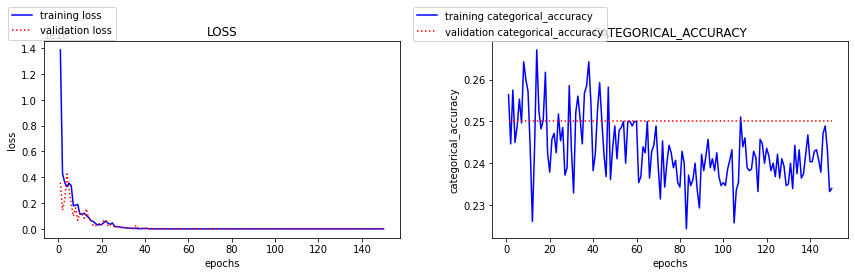

[[0.2497146  0.24856952 0.2510042  0.25071168]
 [0.2497146  0.24856952 0.2510042  0.25071168]
 [0.2497146  0.24856952 0.2510042  0.25071168]
 ...
 [0.2497146  0.24856952 0.2510042  0.25071168]
 [0.2497146  0.24856952 0.2510042  0.25071168]
 [0.2497146  0.24856952 0.2510042  0.25071168]]
Accuracy :  0.0


In [490]:
Nin = 12
Nh_l = [64,128]
Nout = 4

def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()


def train():
    

    model = Sequential()

    model.add(Input(shape = (12,)))
    model.add(Dense(Nh_l[0], activation='relu'))
    model.add(Dense(Nh_l[1], activation='relu'))
    model.add(Dense(Nh_l[1], activation='relu'))
    model.add(Dense(Nh_l[0], activation='relu'))
    model.add(Dense(4, activation = "softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=tf.keras.metrics.categorical_accuracy)

    # # history = model.fit(tr_x, tr_y, epoch=300, batch_size=32, validation_data = (val_x, val_y))
    history = model.fit(tr_x, tr_y, epochs=150, batch_size=32, validation_data = (val_x, val_y))
    model.summary()
    
    plot_history(history)
 
    solution = model.predict(test_x)

    print(solution)
    answer = test_y
    count = 0
    total = len(test_y)

    for i in range(len(test_y)):
        if (np.all(solution[i] == answer[i])):
            count += 1
    print("Accuracy : ",count / total)


train()